In [13]:
# %%
# Cell 1：載入套件並讀取資料
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 清除字體設定
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# 讀取 CSV 
df = pd.read_csv('VerbalFluencyTest_cleaned.csv')

# 確認前幾筆
df.head()

,NUMBER,Age,Gender,Analysis Result,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency
0,1,63,2,0,0.895205,0.684282,0.854517,1.000000,0.940569
1,2,67,2,1,0.563597,0.267195,0.853779,0.653680,0.442837
2,3,69,1,1,0.227932,0.136541,0.317103,0.317103,0.616538
3,4,58,2,0,1.000000,0.683591,0.939348,1.000000,0.895420
4,5,72,2,1,0.606681,0.201904,0.407563,0.541407,0.436888


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NUMBER            960 non-null    int64  
 1   Age               960 non-null    int64  
 2   Gender            960 non-null    int64  
 3   Analysis Result   960 non-null    int64  
 4   Verbal Fluency    960 non-null    float64
 5   Lexical Richness  960 non-null    float64
 6   Speech Rate       960 non-null    float64
 7   Accuracy          960 non-null    float64
 8   Voice Fluency     960 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 67.6 KB


,NUMBER,Age,Gender,Analysis Result,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,503.805208,67.069792,1.756250,0.143750,0.694800,0.620816,0.737554,0.787374,0.826507
std,296.363997,8.016688,0.429567,0.351019,0.252454,0.250734,0.234019,0.292060,0.188144
min,1.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.059926,0.000000,0.100483
25%,243.750000,62.000000,2.000000,0.000000,0.572425,0.505096,0.604668,0.625000,0.729976
50%,502.000000,67.000000,2.000000,0.000000,0.724185,0.697192,0.859760,1.000000,0.866316
75%,766.250000,72.000000,2.000000,0.000000,0.891512,0.780698,0.878658,1.000000,1.000000
max,1010.000000,94.000000,2.000000,1.000000,1.000000,1.000000,0.989835,1.000000,1.000000


Analysis Result
0    822
1    138
Name: count, dtype: int64

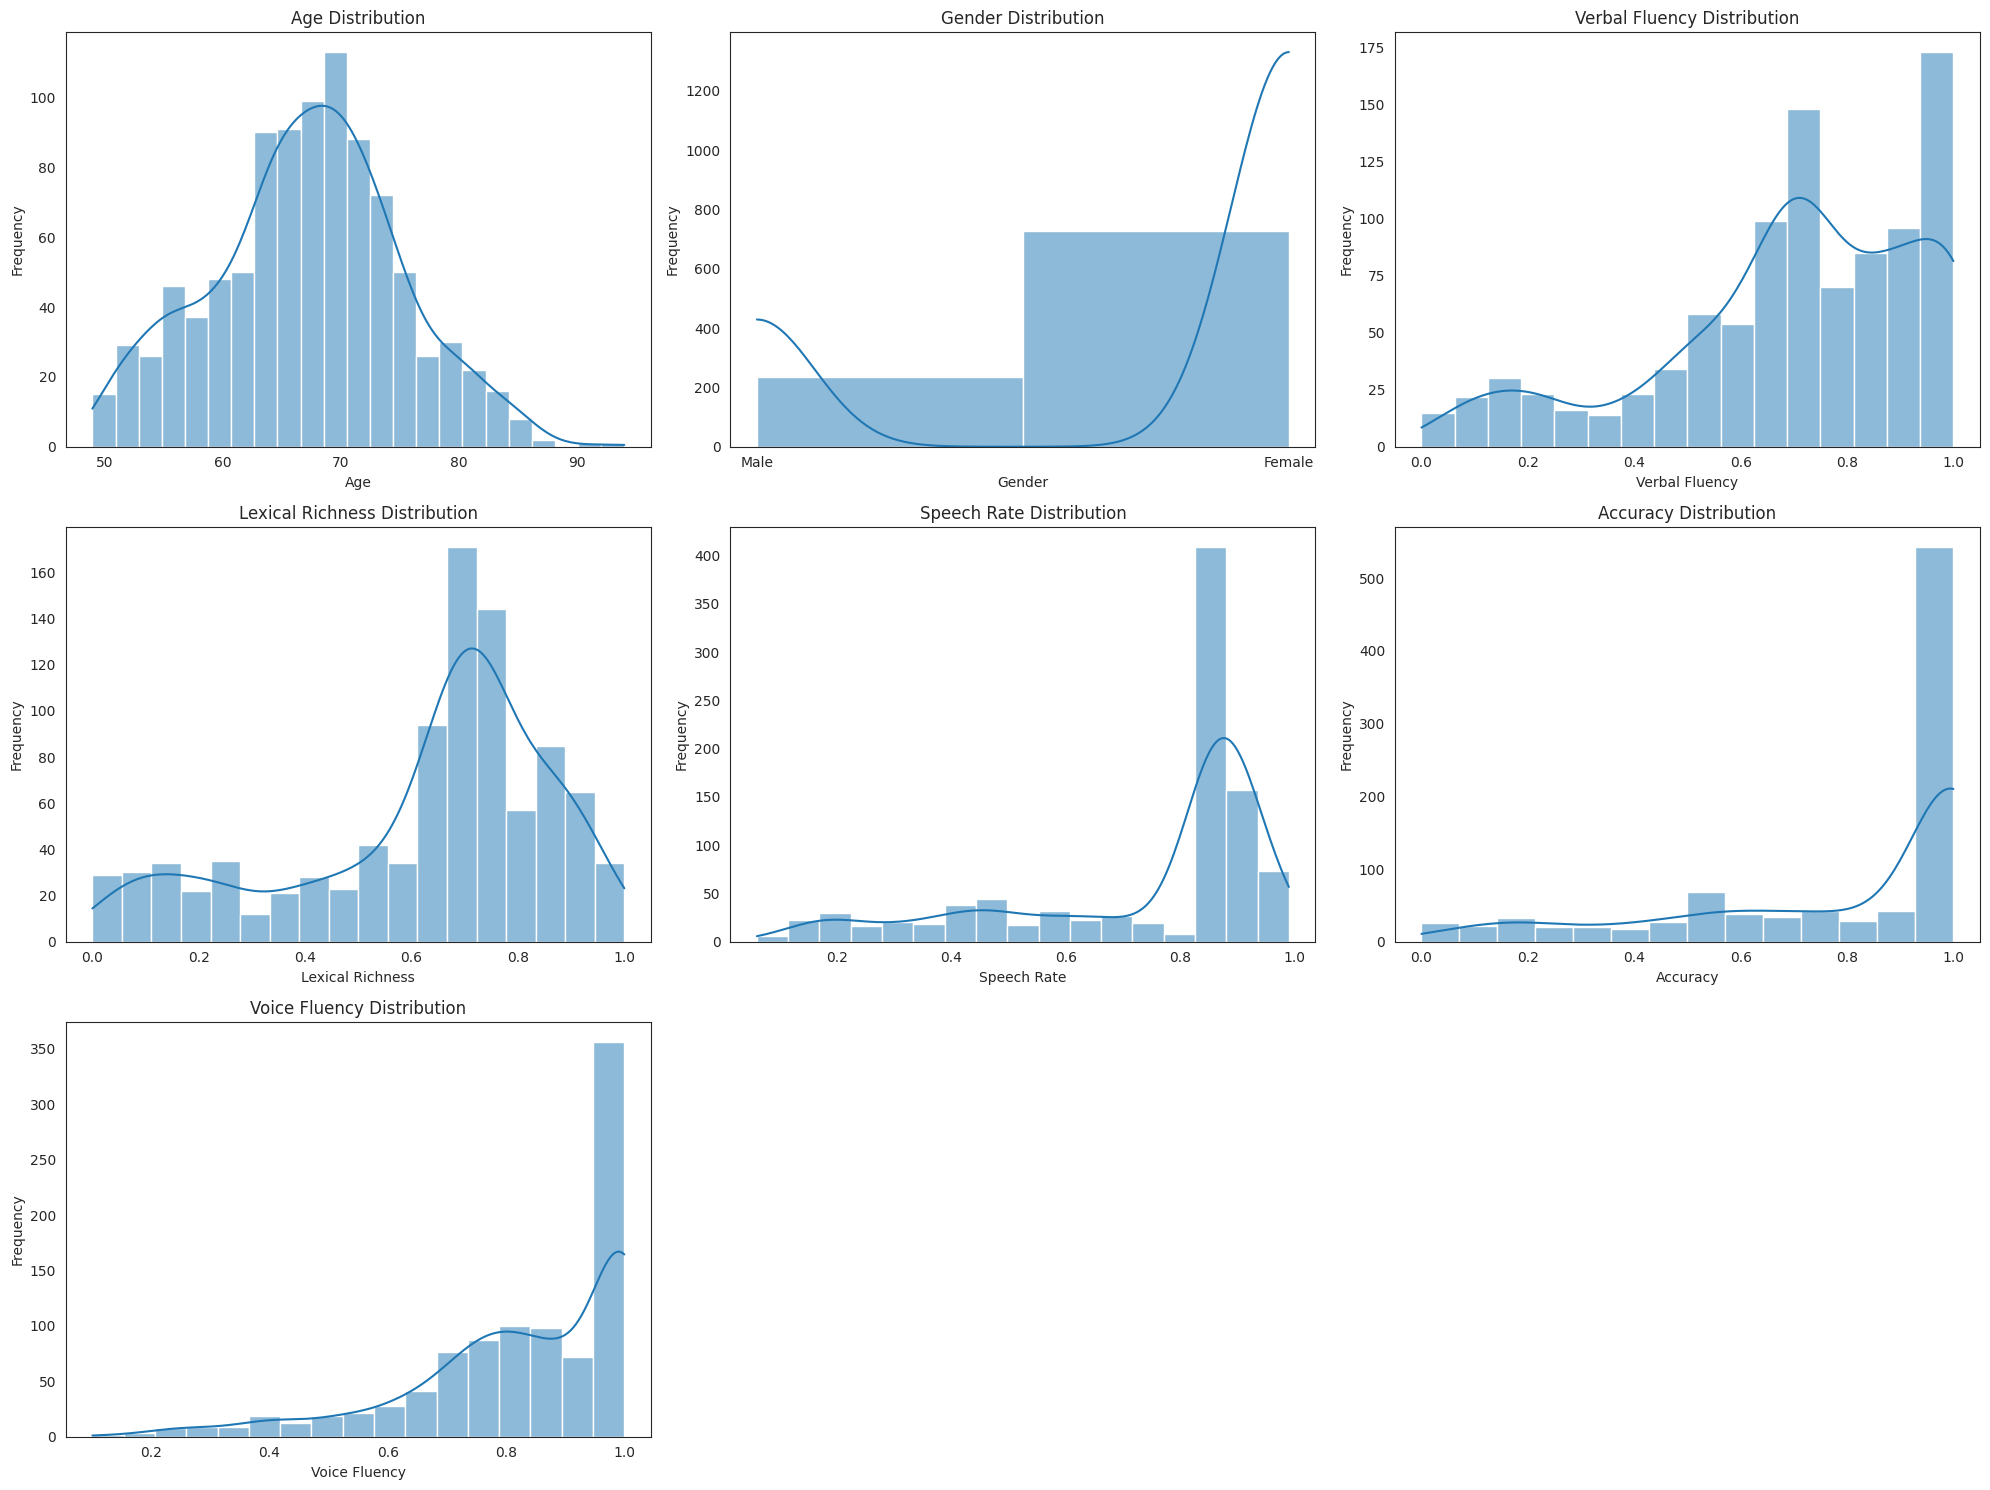

In [14]:
# %%
# 程式碼區塊 2：資料總覽與描述性統計
# 資料欄位與型態
df.info()

# 敘述性統計（數值欄位）
display(df.describe())

# 分類欄位（分析結果）分布
display(df['Analysis Result'].value_counts())

# 各分數欄位列表
numeric_cols = ['Verbal Fluency', 'Lexical Richness', 'Speech Rate', 'Accuracy', 'Voice Fluency']

# 建立一個大圖，包含所有分布圖
plt.figure(figsize=(20, 15))

# 年齡分布
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 性別分布視覺化
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Gender', kde=True, bins=2)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([1, 2], ['Male', 'Female'])

# 各分數分布
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+3)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
# %%
# 程式碼區塊 3：檢查遺失值與唯一值
# 各欄位缺失值統計
display(df.isnull().sum())

# 各欄位唯一值數量
display(df.nunique())

NUMBER              0
Age                 0
Gender              0
Analysis Result     0
Verbal Fluency      0
Lexical Richness    0
Speech Rate         0
Accuracy            0
Voice Fluency       0
dtype: int64

NUMBER              960
Age                  41
Gender                2
Analysis Result       2
Verbal Fluency      768
Lexical Richness    951
Speech Rate         953
Accuracy            125
Voice Fluency       660
dtype: int64

/tmp/ipykernel_683891/692813224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Analysis Result', data=df,


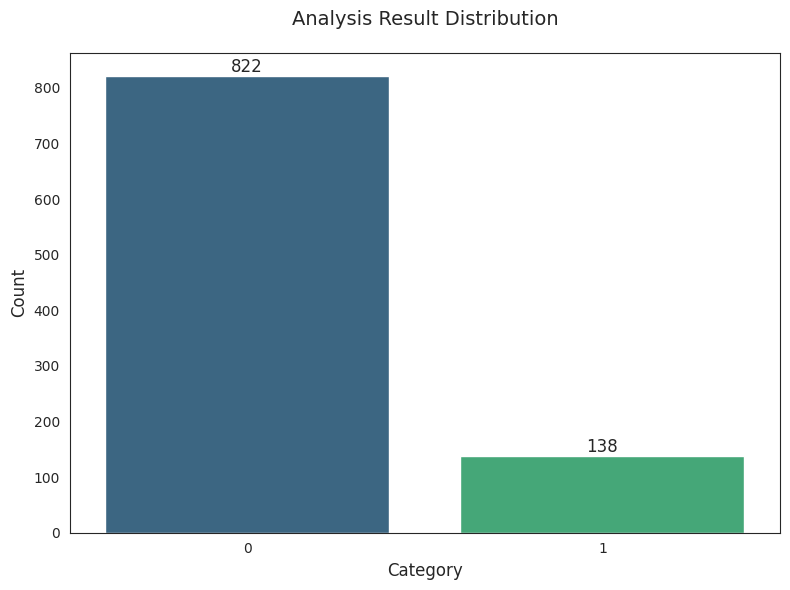

In [16]:
# %%
# 程式碼區塊 4：分析結果分類分布
plt.figure(figsize=(8,6))
sns.countplot(x='Analysis Result', data=df,
              order=df['Analysis Result'].value_counts().index,
              palette='viridis')
plt.title('Analysis Result Distribution', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 在每個柱狀圖上添加數字標籤
for i, count in enumerate(df['Analysis Result'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# 調整圖表樣式
sns.set_style("white")
plt.tight_layout()
plt.show()

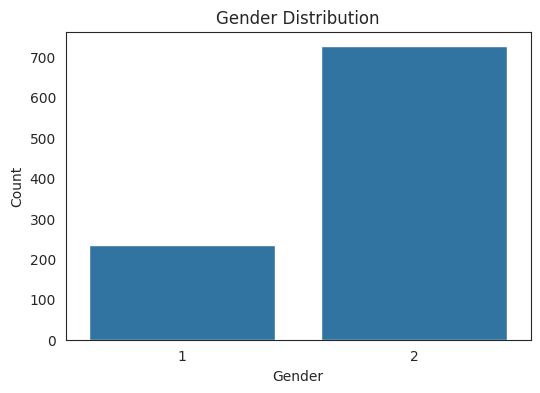

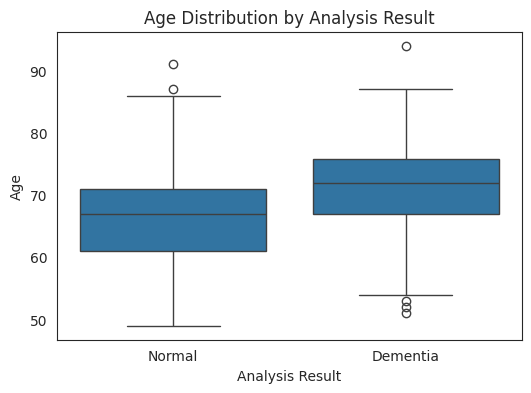

In [17]:
# %%
# 程式碼區塊 5：性別與年齡分布
# 性別分布 (1=男, 2=女)
plt.figure(figsize=(6,4))
gender_mapping = {1: 'Male', 2: 'Female'}
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
# Replace tick labels
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

# 依分析結果檢視年齡分布
plt.figure(figsize=(6,4))
result_mapping = {'Normal': 'Normal', 'Dementia': 'Dementia'}
sns.boxplot(x='Analysis Result', y='Age', data=df)
plt.title('Age Distribution by Analysis Result')
plt.xlabel('Analysis Result')
# Update xtick labels if needed
if len(df['Analysis Result'].unique()) == 2:
    plt.xticks([0, 1], ['Normal', 'Dementia'])
plt.ylabel('Age')
plt.show()


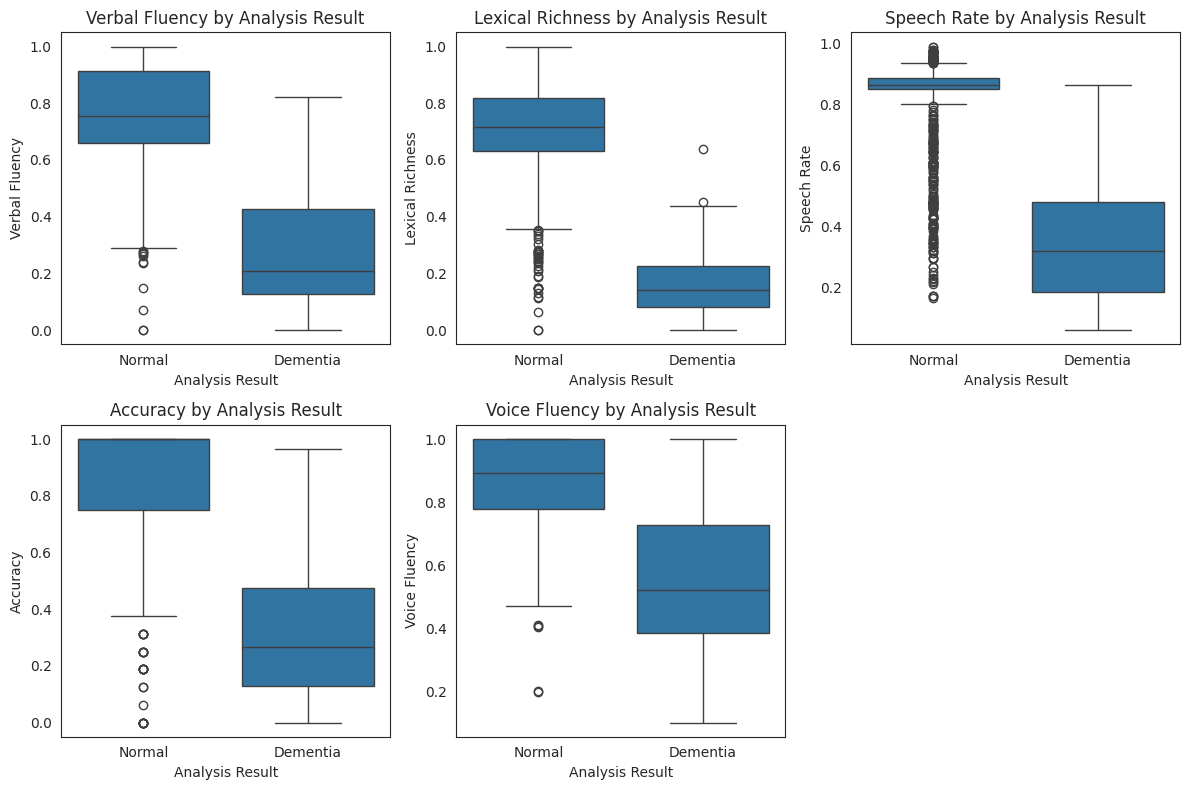

In [19]:
# %%
# 程式碼區塊 6：各分數指標箱型圖（依分析結果）
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Analysis Result', y=col, data=df)
    plt.title(f'{col} by Analysis Result')
    plt.xlabel('Analysis Result')
    plt.xticks([0, 1], ['Normal', 'Dementia'])
    plt.ylabel(col)
plt.tight_layout()
plt.show()


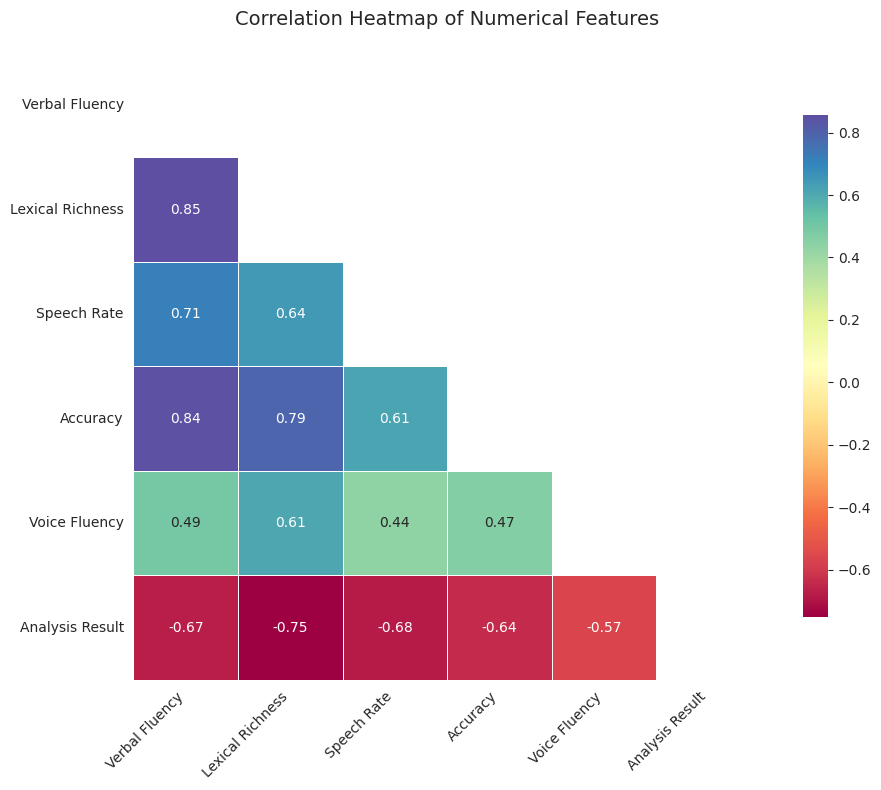

In [20]:
# %% 
# 程式碼區塊 7：數值特徵與分析結果相關性熱圖
# 設定圖表大小
plt.figure(figsize=(10, 8))

# 計算相關係數矩陣，包含分析結果
corr = df[numeric_cols + ['Analysis Result']].corr()

# 建立遮罩：遮住右上角（上三角矩陣）
mask = np.triu(np.ones_like(corr, dtype=bool))

# 繪製熱圖，使用Spectral色階
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Spectral", 
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot_kws={"size": 10})

# 美化標題和標籤
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()


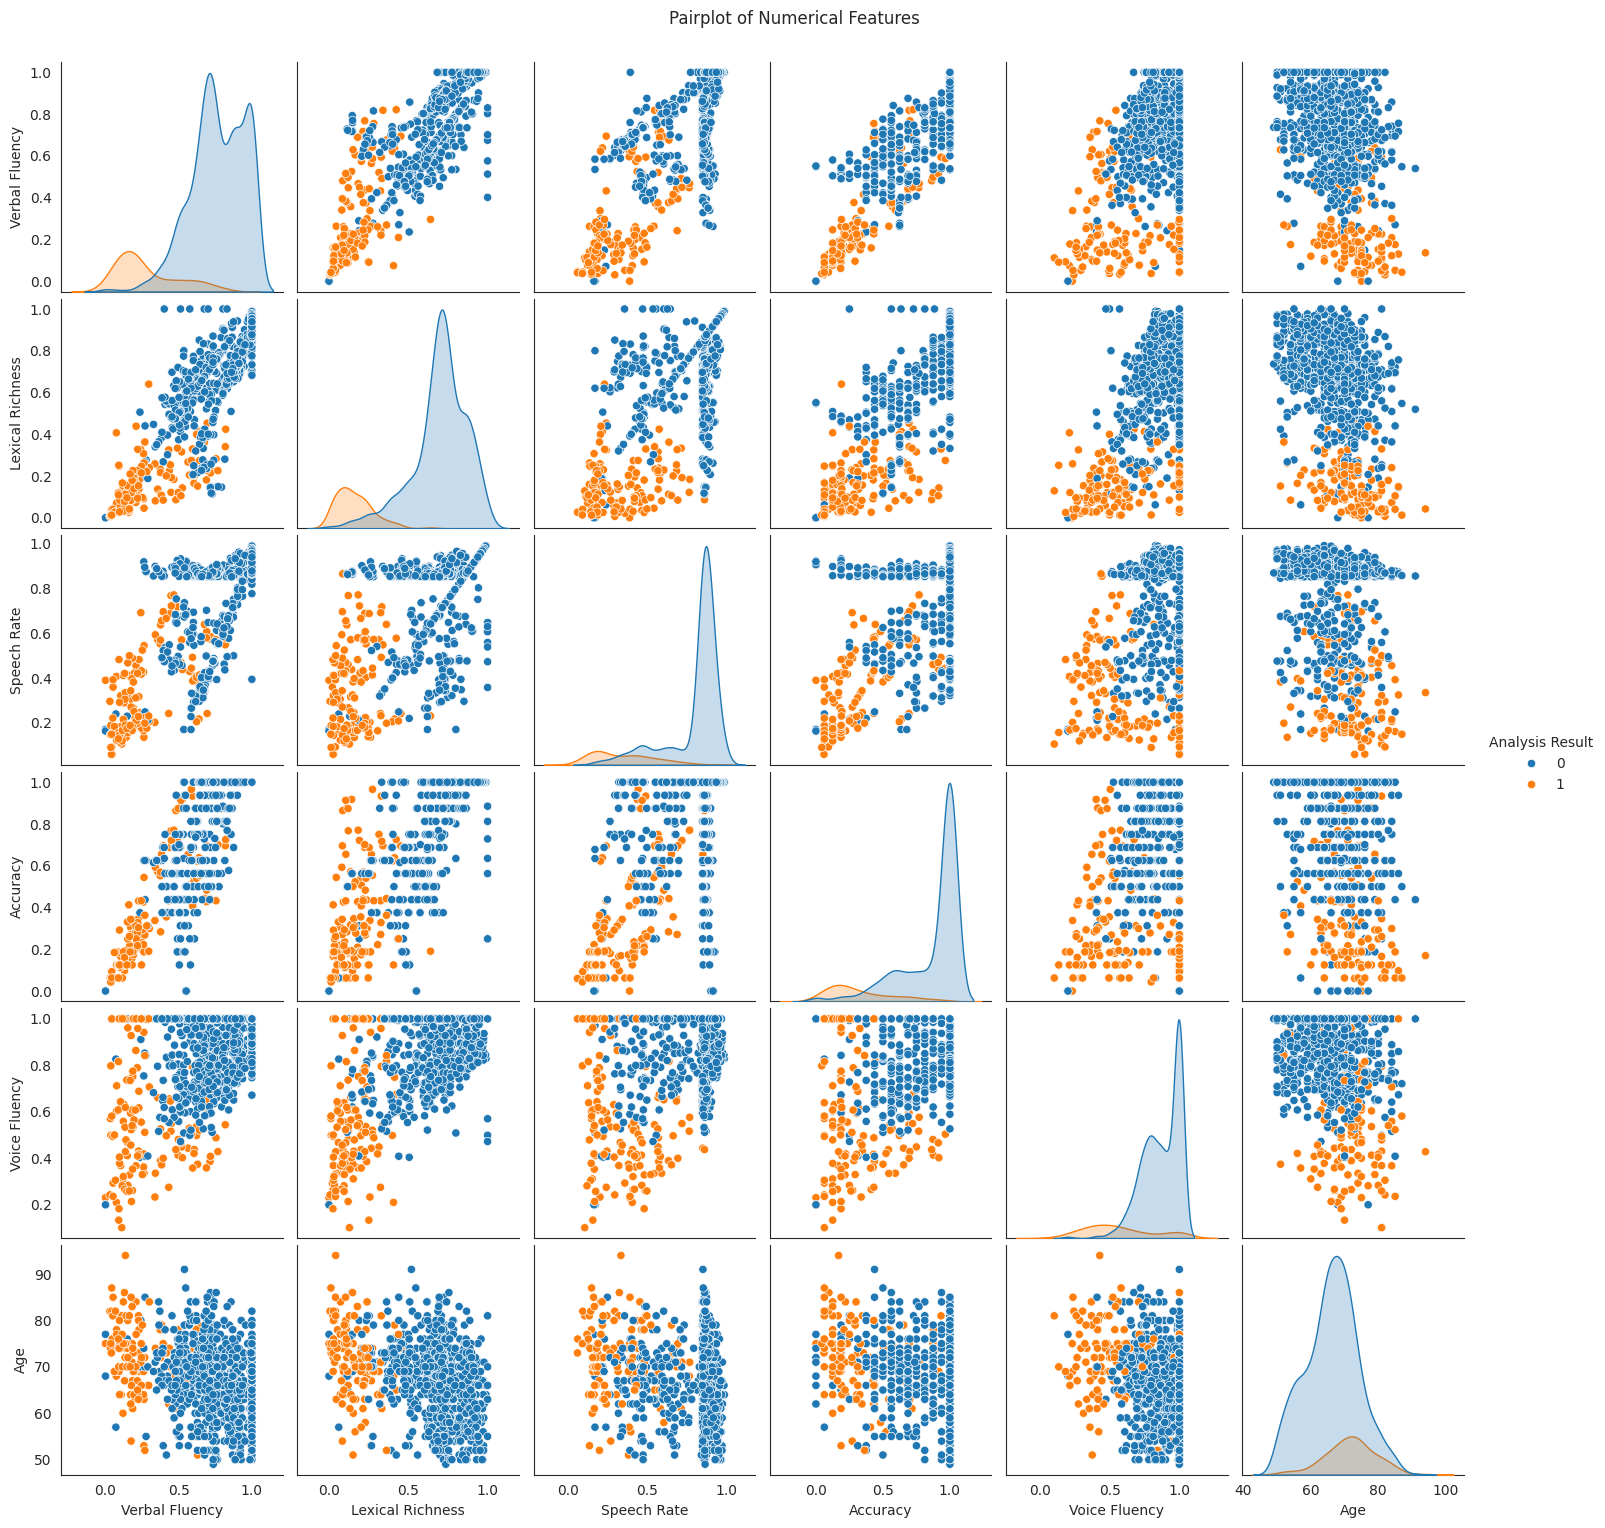

In [21]:
# %%
# 程式碼區塊 8：Pairplot（依分析結果著色）
# 建立包含數值欄位與分析結果的資料
plot_df = df[numeric_cols + ['Age', 'Analysis Result']].copy()

# 繪製 pairplot，依分析結果上色
sns.pairplot(plot_df, hue='Analysis Result', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


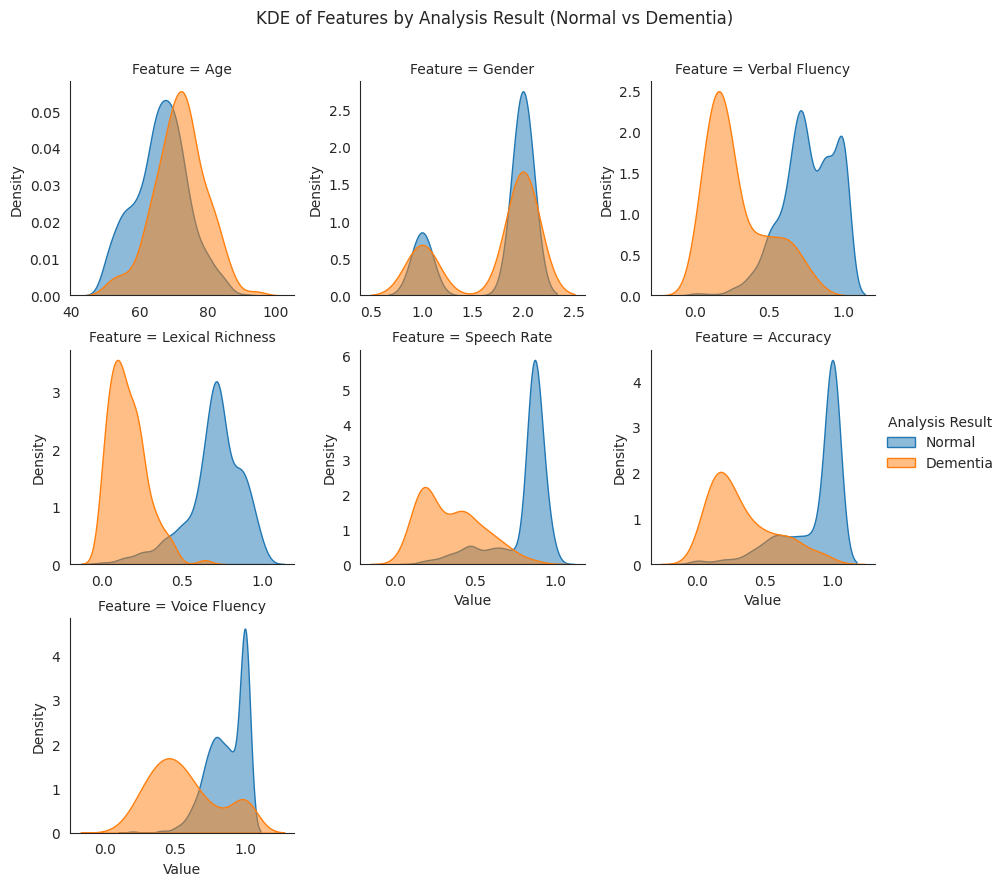

In [23]:
# %%
# 程式碼區塊 9：KDE圖（依分析結果著色）
features = ['Age', 'Gender', 'Verbal Fluency', 'Lexical Richness', 
            'Speech Rate', 'Accuracy', 'Voice Fluency']

# 建立 0/1 對應文字欄位
label_mapping = {0: 'Normal', 1: 'Dementia'}
df['Analysis Result Label'] = df['Analysis Result'].map(label_mapping)

# 把要畫的資料組合成新DataFrame
plot_df = df[features + ['Analysis Result', 'Analysis Result Label']]

# 轉成長格式，方便畫圖
melted_df = plot_df.melt(id_vars=['Analysis Result', 'Analysis Result Label'], var_name='Feature', value_name='Value')

# 用 FacetGrid 畫所有特徵的 KDE
g = sns.FacetGrid(melted_df, col="Feature", col_wrap=3, hue="Analysis Result Label", sharex=False, sharey=False)
g.map(sns.kdeplot, "Value", common_norm=False, fill=True, alpha=0.5)

# 加圖例
g.add_legend(title="Analysis Result")

# 設定整體標題
plt.subplots_adjust(top=0.9)
g.fig.suptitle('KDE of Features by Analysis Result (Normal vs Dementia)')

plt.show()


In [17]:
# %%
# 程式碼區塊 9：Group Descriptive Statistics by Analysis Result

# Calculate mean statistics by group
group_stats = df.groupby('Analysis Result')[numeric_cols + ['Age']].mean()

# Display the results
print("Group Statistics - Mean Values:")
display(group_stats)

# Additional statistics - standard deviations
group_std = df.groupby('Analysis Result')[numeric_cols + ['Age']].std()

print("\nGroup Statistics - Standard Deviations:")
display(group_std)


Group Statistics - Mean Values:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.280476,0.161006,0.350191,0.330225,0.565985,71.731884
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,70.200000
Normal,0.764358,0.698010,0.802586,0.864122,0.870244,66.287105



Group Statistics - Standard Deviations:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.208288,0.113773,0.190961,0.240447,0.245432,7.490666
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,7.149698
Normal,0.183050,0.172542,0.168609,0.221278,0.134062,7.838367
